In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd

# CSV 파일 경로 설정
file_path = "/content/steam.csv"

# CSV 파일 불러오기
df = pd.read_csv(file_path)


In [6]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [60]:
df.shape

(25100, 19)

In [14]:
print(df.isnull().sum())

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
year                0
user_rating         0
dtype: int64


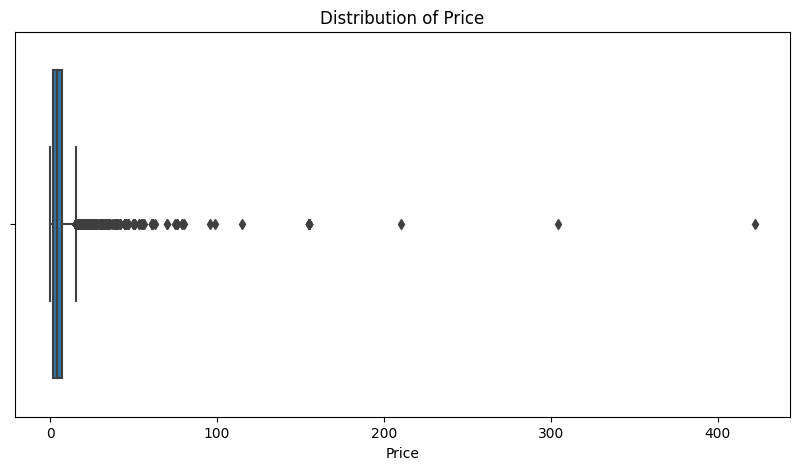

In [15]:
# 필요한 패키지를 로드합니다.
import seaborn as sns
import matplotlib.pyplot as plt

# 가격(price) 변수의 분포를 확인합니다.
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.show()

In [16]:
# IQR 기반의 이상치 제거
def remove_outliers_IQR(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# 가격(price) 변수의 이상치를 제거합니다.
df = remove_outliers_IQR(df, 'price')

In [17]:
# 범주형 변수 확인
print(df['developer'].unique())
print(df['publisher'].unique())
print(df['platforms'].unique())
print(df['categories'].unique())
print(df['genres'].unique())
print(df['steamspy_tags'].unique())

['Valve' 'Gearbox Software' 'Valve;Hidden Path Entertainment' ...
 'SHEN JIAWEI' 'Semyon Maximov' 'Adept Studios GD']
['Valve' 'Mark Healey' 'Tripwire Interactive' ... 'MonteCube'
 'Velvet Paradise Games' 'SHEN JIAWEI']
['windows;mac;linux' 'windows;mac' 'windows' 'windows;linux' 'mac'
 'mac;linux' 'linux']
['Multi-player;Online Multi-Player;Local Multi-Player;Valve Anti-Cheat enabled'
 'Multi-player;Valve Anti-Cheat enabled'
 'Single-player;Multi-player;Valve Anti-Cheat enabled' ...
 'Online Multi-Player;Steam Achievements;Full controller support;In-App Purchases;Steam Cloud'
 'Multi-player;Local Multi-Player;Co-op;Local Co-op;Shared/Split Screen'
 'Multi-player;Online Multi-Player;Cross-Platform Multiplayer;Stats']
['Action' 'Action;Free to Play' 'Action;Free to Play;Strategy' ...
 'Action;Adventure;Indie;Massively Multiplayer;RPG;Strategy;Early Access'
 'Action;Adventure;Casual;Free to Play;Indie;RPG;Simulation;Sports;Strategy'
 'Casual;Free to Play;Massively Multiplayer;RPG;Early A

In [18]:
# 범주형 변수를 Ordinal Encoding으로 처리합니다.
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df[['developer', 'publisher', 'platforms', 'categories', 'genres', 'steamspy_tags']] = ordinal_encoder.fit_transform(df[['developer', 'publisher', 'platforms', 'categories', 'genres', 'steamspy_tags']])


<ipython-input-18-ba3af483c16f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['developer', 'publisher', 'platforms', 'categories', 'genres', 'steamspy_tags']] = ordinal_encoder.fit_transform(df[['developer', 'publisher', 'platforms', 'categories', 'genres', 'steamspy_tags']])


In [21]:
# owners 변수에서 범위 형태의 문자열을 대표값으로 변환합니다.
owners = []
for value in df['owners']:
    if '-' in value:
        min_value, max_value = value.split('-')
        owners.append((int(min_value) + int(max_value)) / 2)
    else:
        owners.append(int(value))

df['owners'] = owners


<ipython-input-21-a325872ce364>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['owners'] = owners


In [23]:
# release_date를 datetime 형식으로 변환합니다.
df['release_date'] = pd.to_datetime(df['release_date'])

# release_year를 생성합니다.
df['release_year'] = df['release_date'].dt.year.astype(int)

# release_date를 제외합니다.
df.drop(['release_date'], axis=1, inplace=True)

# owners를 정규화합니다.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['owners'] = scaler.fit_transform(df[['owners']])


<ipython-input-23-0abf22b4ab18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = pd.to_datetime(df['release_date'])
<ipython-input-23-0abf22b4ab18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = df['release_date'].dt.year.astype(int)
<ipython-input-23-0abf22b4ab18>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [25]:

# 가격(price) 변수를 MinMaxScaler로 스케일링합니다.
scaler = MinMaxScaler()
df['price'] = scaler.fit_transform(df[['price']])


<ipython-input-25-423a1d217248>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = scaler.fit_transform(df[['price']])


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25100 entries, 0 to 27074
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             25100 non-null  int64  
 1   english           25100 non-null  int64  
 2   developer         25100 non-null  float64
 3   publisher         25100 non-null  float64
 4   platforms         25100 non-null  float64
 5   required_age      25100 non-null  int64  
 6   categories        25100 non-null  float64
 7   genres            25100 non-null  float64
 8   steamspy_tags     25100 non-null  float64
 9   achievements      25100 non-null  int64  
 10  positive_ratings  25100 non-null  int64  
 11  negative_ratings  25100 non-null  int64  
 12  average_playtime  25100 non-null  int64  
 13  median_playtime   25100 non-null  int64  
 14  owners            25100 non-null  float64
 15  price             25100 non-null  float64
 16  year              25100 non-null  int64 

In [9]:
# 출시일(release date) 변수에서 출시 연도 정보를 추출합니다.
df['year'] = pd.DatetimeIndex(df['release_date']).year


In [12]:
# "user_rating" 변수를 생성합니다.
df['user_rating'] = df['positive_ratings'] / (df['positive_ratings'] + df['negative_ratings'])


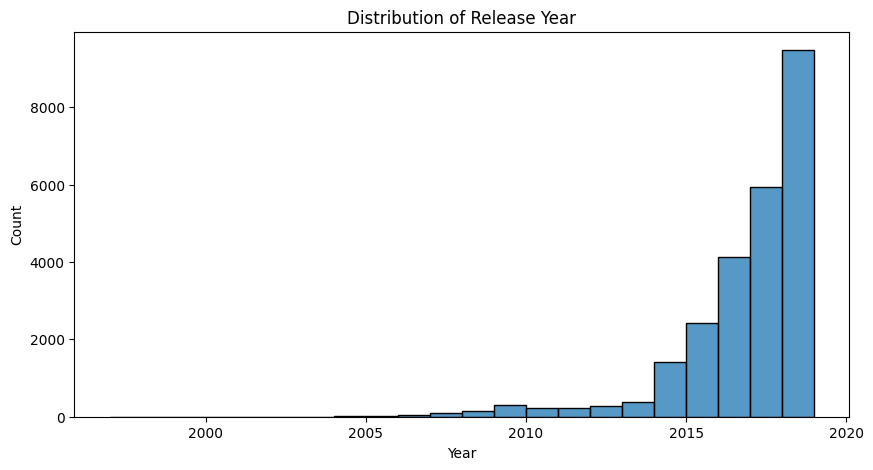

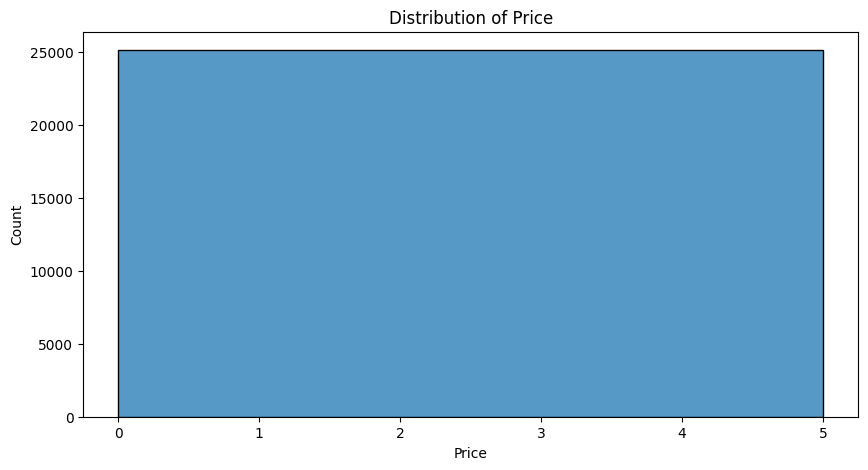

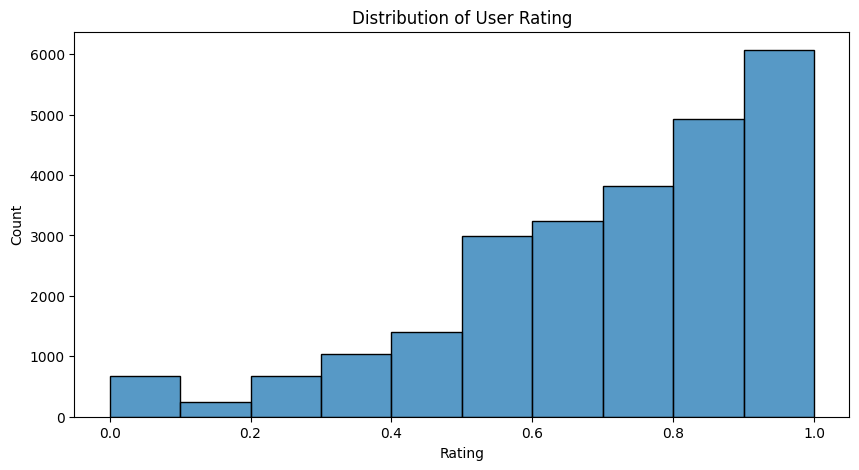

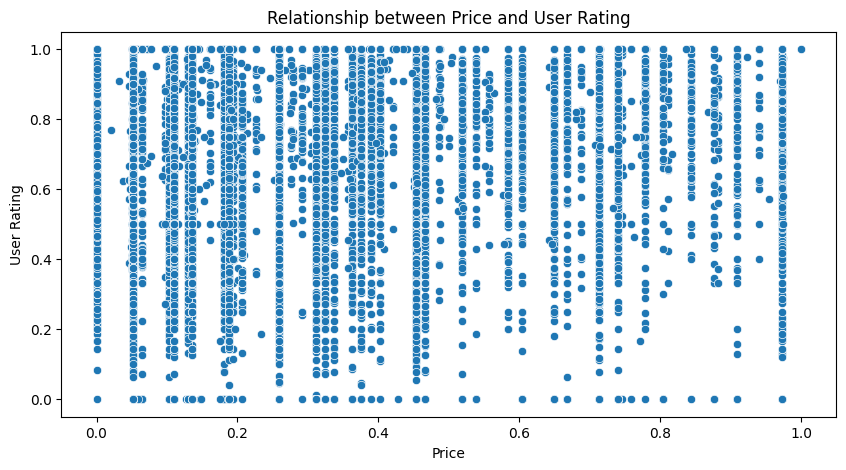

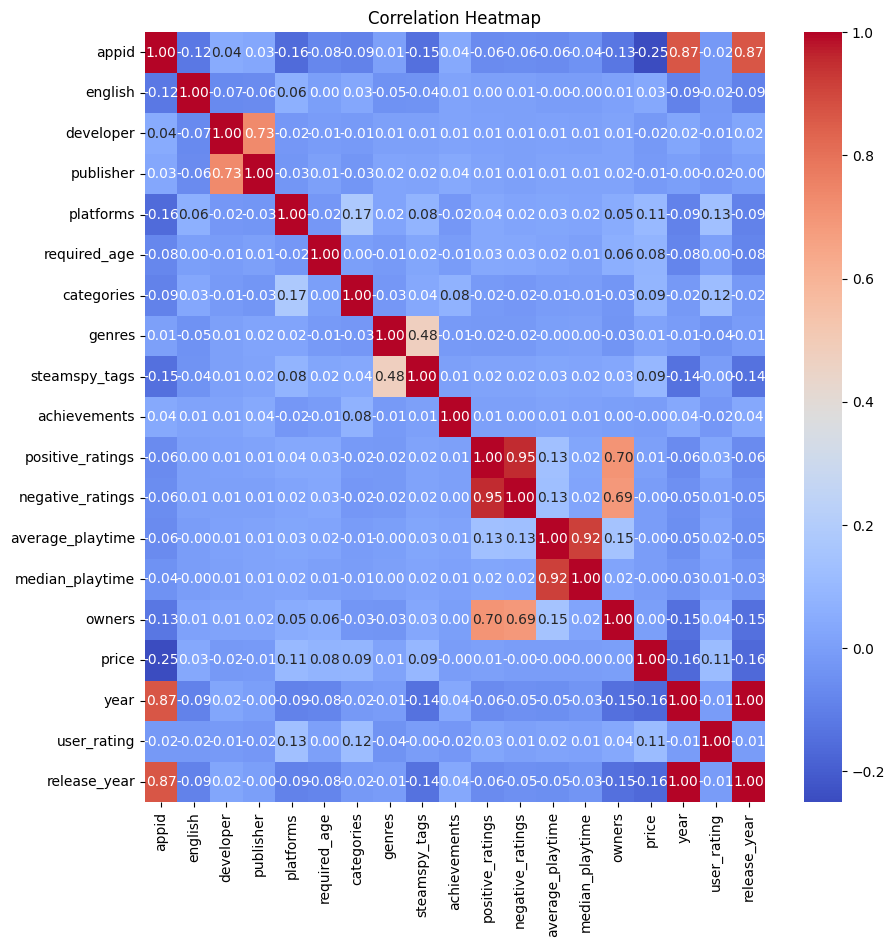

In [61]:

# 게임의 출시 연도 분포를 확인합니다.
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="year", binwidth=1)
plt.title("Distribution of Release Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# 게임의 가격 분포를 확인합니다.
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="price", binwidth=5)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# 게임의 사용자 평가 분포를 확인합니다.
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="user_rating", binwidth=0.1)
plt.title("Distribution of User Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# 게임의 사용자 평가와 가격의 관계를 확인합니다.
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="price", y="user_rating")
plt.title("Relationship between Price and User Rating")
plt.xlabel("Price")
plt.ylabel("User Rating")
plt.show()

# 변수 간의 상관관계를 확인합니다.
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

---
---
---
---
데이터 전처리및 시각화 진행 

In [27]:
from sklearn.model_selection import train_test_split

# 훈련 데이터와 검증 데이터를 나눕니다.
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)


In [28]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 훈련 데이터와 검증 데이터를 XGBoost 모델에 적합한 형태로 변환합니다.
X_train = train_df.drop(['price'], axis=1)
y_train = train_df['price']
X_val = val_df.drop(['price'], axis=1)
y_val = val_df['price']

In [29]:
# Baseline 모델 선정

import numpy as np

# 훈련 데이터의 price 평균값을 계산합니다.
mean_price = np.mean(train_df['price'])

# 검증 데이터에 대해, 예측값으로 price의 평균값을 사용합니다.
preds = np.full_like(y_val, mean_price)

# 예측값과 실제값의 평균 제곱 오차를 계산합니다.
rmse = np.sqrt(mean_squared_error(y_val, preds))
print("RMSE: %f" % (rmse))


RMSE: 0.250383


In [32]:
# XGBoost 모델 객체를 생성합니다.
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)

# XGBoost 모델을 학습시킵니다.
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [33]:
# 검증 데이터셋에 대해 예측값을 계산합니다.
preds = xgb_model.predict(X_val)

# 예측값과 실제값의 평균 제곱 오차를 계산합니다.
rmse = np.sqrt(mean_squared_error(y_val, preds))
print("RMSE: %f" % (rmse))


RMSE: 0.199260


In [34]:
# 하이퍼 파라미터 튜닝

param_grid = {
    'n_estimators': [300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0],
    'reg_alpha': [0, 0.1, 0.3],
    'reg_lambda': [1, 1.5, 2]
}


In [36]:
from sklearn.model_selection import RandomizedSearchCV


xgb_model = xgb.XGBRegressor()

search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, 
                            n_iter=50, scoring='neg_mean_squared_error', 
                            cv=5, verbose=3, random_state=42, n_jobs=-1)

search.fit(X_train, y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 0.3],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [38]:
# 최적 파라미터 

print(search.best_params_)


{'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


In [39]:
print(search.best_score_)


-0.037806401584066944


In [41]:
# 최적 모델 rmse 점수 

# 최적의 모델을 가져옵니다.
best_model = search.best_estimator_

# 검증 데이터셋에 대한 예측값을 구합니다.
y_pred = best_model.predict(X_val)

# RMSE를 계산합니다.
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse:.4f}")


RMSE: 0.1941


In [46]:
from sklearn.metrics import r2_score

y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Train R2 Score: {train_r2:.4f}")
print(f"Validation R2 Score: {val_r2:.4f}")


Train R2 Score: 0.7559
Validation R2 Score: 0.3984


In [54]:
#검증 세트에서 r2스코어 급락으로 과적합 된 것을 알 수 있음 


params = {
    'n_estimators': 10000,
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'random_state': 42,
}


xgb_model = xgb.XGBRegressor(**params)

dtrain = xgb.DMatrix(X_train, label=y_train)

# 교차 검증 수행
cv_result = xgb.cv(params, dtrain, num_boost_round=1000, nfold=5, metrics='rmse', 
                   early_stopping_rounds=50, stratified=False, seed=42, verbose_eval=10)

# 최적의 부스팅 라운드 수 확인
n_estimators = cv_result.shape[0]
print(f"Optimal boosting rounds = {n_estimators}")

# 최적의 부스팅 라운드에서 테스트 RMSE 측정
best_model = xgb.train(params, dtrain, num_boost_round=n_estimators)

y_pred_train = best_model.predict(dtrain)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {rmse_train}")
print(f"Train R2 Score: {r2_train}")


[04:07:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[04:07:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[04:07:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[04:07:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[04:07:56] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[0]	train-rmse:0.30396+0.00068	test-rmse:0.30429+0.00230
[10]	train-rmse:0.22641+0.00057	test-rmse:0.22965+0.00170
[20]	train-rmse:0.20679+0.00044	test-rmse:0.21260+0.00170
[30]	train-rmse:0.19866+0.00041	test-rmse:0.20682+0.00186
[40]	train-rmse:0.19390+0.00053	test-rmse:0.20397+0.00184
[50]	train-rmse:0.19021+0.00043	test-rmse:0.20193+0.00208
[60]	train-rmse:0.18730+0.00046	test-rmse:0.20060+0.00202
[70]	train-rmse:0.18501+0.00064	test-rmse:0.19977+0.00188
[80]	train-rmse:0.18287+0.00062	test-rmse:0.19915+0.00188
[90]	train-rmse:0.18102+0.000

NameError: ignored

In [57]:
# 최적 반복 수 확인
best_iter = cv_result.shape[0]
print(f"Best Iteration: {best_iter}")

# 최적 반복 수로 모델 재학습
eval_set = [(X_val, y_val)]
xgb_model.fit(X_train, y_train, early_stopping_rounds=best_iter,eval_set=eval_set, verbose=False)


Best Iteration: 450


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [59]:
y_pred = xgb_model.predict(X_val)

# rmse 계산
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'Validation RMSE: {rmse:.4f}')

# R2 계산
r2 = r2_score(y_val, y_pred)
print(f'Validation R2 Score: {r2:.4f}')

Validation RMSE: 0.1945
Validation R2 Score: 0.3963


In [42]:
# feature 중요도 

# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):

    # 변수 중요도와 변수 이름을 정렬해서 df로 저장
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    # 변수가 너무 많으면 보기 어려우니, top N 지정
    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    # 그래프 그리기
    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)
    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    # 저장한 변수 중요도 df 반환
    return fi_df

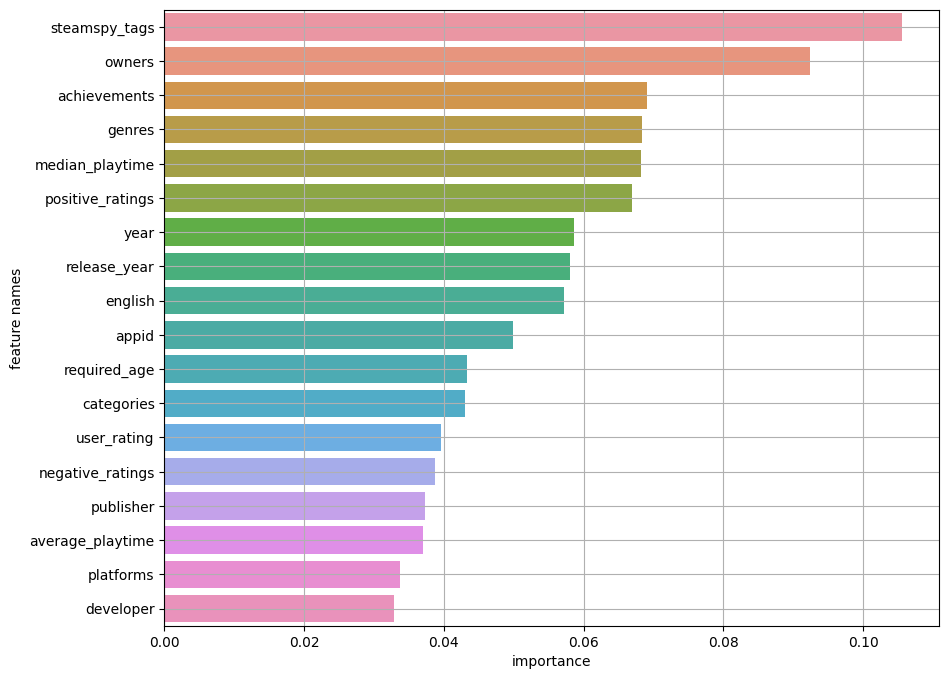

In [45]:
result1 = plot_feature_importance(best_model.feature_importances_, list(X_train))